# Lekce 6

## Korelace

V reálném světě se často stává, že nějaká skutečnost má vliv na něco jiného. Npaříklad čas strávený studiem má vliv na body. V souboru [Student_Marks.csv](Student_Marks.csv) jsou data o průměrné době, kterou uživatelé strávili studiem on-line kurzu, a průměrným počtem bodů, které z kurzů dostali. Podívejme se, jak silný je vliv doby strávené studiem na bodový výsledek.

In [4]:
import pandas as pd
import seaborn as sns
from scipy import stats
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

data = pd.read_csv("Student_Marks.csv")
data.head()

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299


K zobrazení použijeme bodový graf (*scatter plot*). Na vodorovné ose máme průměrný čas strávený studiem a na svislé ose průměrný počet bodů. Vidíme, že známka má tendenci růst s tím, jak roste čas strávený studiem. Současně je patrný jistý vliv náhody. Takové závislosti se říká stochastická závislost (*stochastic dependence*). Dále platí, že závislost je lineární (*linear*), tj. kdybychom ho chtěly popsat pomocí matematické funkce, mohli bychom použít přímku.

c:\Users\jiri.pesik.HULD\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jiri.pesik.HULD\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='time_study', ylabel='Marks'>

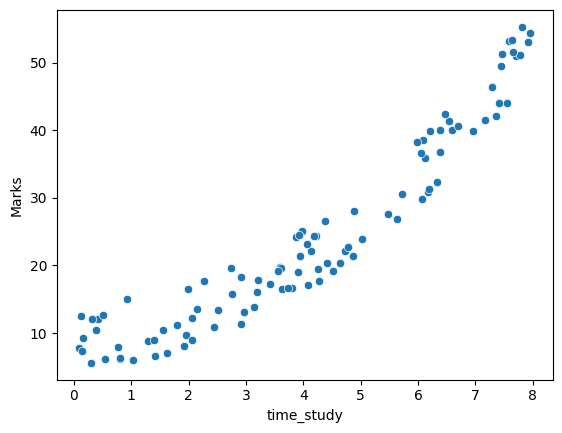

In [5]:
sns.scatterplot(data=data, x="time_study", y="Marks")

Takové závislosti říkáme **korelace** (*correlation*) a to, jak je závislost silná, můžeme popsat pomocí **korelačního koeficientu** (*correlation coefficient*). Pro jeho hodnoty platí následující:

- Hodnoty blízko +1 znamenají silnou přímou lineární závislost, tj. hodnoty v obou sloupcích rostou současně.
- Hodnoty blízko 0 znamenají lineární nezávislost.
- Hodnoty blízko -1 znamenají silnou nepřímou lineární závislost, tj. jedna hodnota roste a současně druhá klesá.

Příklady přímé závislosti: čas strávený studiem a výsledek v testu, délka tréninku a výsledek v závodě, délka praxe a výše mzdy atd. Příklady nepřímé závislosti: množství vypitého alkoholu a kognitivní schopnosti, zimní teploty a spotřeba energie na vytápění.

Hodnotu korelace zjistíme pomocí metody `corr()` pro zvolenou tabulku.

In [6]:
data.corr()

,number_courses,time_study,Marks
number_courses,1.000000,0.204844,0.417335
time_study,0.204844,1.000000,0.942254
Marks,0.417335,0.942254,1.000000


Korelace automaticky neznamená, že obě veličiny se vzájemně ovlivňují.

Uvažujme například počet turistů a počet komárů v kempu u přehrady. Obě veličiny jsou sice korelované, ale v důsledku počasí jako třetího vlivu. Pokud bychom například kemp zavřeli a počet turistů by klesl na nulu, počet komárů to nijak neovlivní.

Podobně můžeme "odhalit" korelaci, která je vy skutečnosti náhodná. Doslova legendárním příkladem se stala korelace mezi počtem lidí, kteří se utopili v důsledku pádu do bazénu, a počtem filmů, ve kterých hrál Nicolas Cage. Z logiky věci je jasné, že tyto veličiny se vzájemně nijak neovlivňují, přesto bychom mezi nimi našli vysokou korelaci.


## Regrese

Samotná informace o tom, že existuje statisticky významný vztah mezi obytnou plochou domu a jeho cenou, sice může být zajímavá, ale můžeme zjistit více. K tomu můžeme využít regresi. Regrese je nástroj, který umí vztah mezi dvěma proměnnými popsat. Abychom si pod slovem "popsat" dokázali něco představit, využijeme graf. Využijeme opět modul `seaborn`, tentokrát vygenerujeme graf pomocí funkce `regplot()`. U regrese vždy rozlušujeme mezi **závislou** (**vysvětlovanou**) a **nezávislou** (**vysvětlující**) proměnnou. Závislou proměnnou umísťujeme na svislou osu (*y*) a nezávislou vodorovnou osu (*x*). V našem případě je nezávislou proměnnou čas strávený studiem a závislou počet bodů. Tvrdíme totiž, že čas strávený studiem ovlivňuje počet bodů, tj. počet bodů vysvětlujeme pomocí času stráveného studiem.

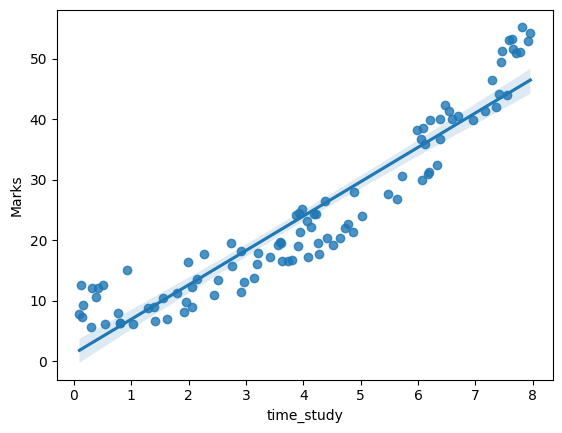

In [7]:
g = sns.regplot(data, x="time_study", y="Marks")

Pomocí této funkce dokážeme predikovat, kolik bodů student nebo studentka kurzu získá, a to na základě počtu hodin, které strávil(a) studiem.

Tato funkce je označovaná jako "lineární" a k jejímu vykreslení potřebujeme znát dvě hodnoty:

- První je hodnota, která určuje, kde leží průsečík s osou *y*. V našem případě jde o hodnotu, která udává počet bodů, který by získal(a) potenciální student(ka), který se na test vůbec nepřipravoval(a) (např. kolik otázek je možné si tipnout).
- Druhá je hodnota, která udává sklon funkce. Čím bude hodnota vyšší, tím více skloněná funkce bude. V našem případě toto číslo určí, kolik dodatečných bodů je možné získat hodinou studia navíc.

K zobrazení těchto hodnot můžeme použít modul *statmodels*. Ten zobrazí poměrně velkou tabulku se spoustou čísel, nás však budou zajímat pouze některá.

In [9]:
formula = "Marks ~ time_study"
mod = smf.ols(formula=formula, data=data)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Marks   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     775.8
Date:                Sun, 22 Oct 2023   Prob (F-statistic):           2.36e-48
Time:                        00:49:46   Log-Likelihood:                -298.21
No. Observations:                 100   AIC:                             600.4
Df Residuals:                      98   BIC:                             605.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2239      0.962      1.272      0.206      -0.686       3.133
time_study     5.6888      0.204     27.853      0.000       5.283       6.094
==============================================================================
Omnibus:                        7.504   Durbin-Watson:                   1.757
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                4.633
Skew:                           0.357   Prob(JB):                       0.0986
Kurtosis:                       2.225   Cond. No.                         9.72
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

V datech vidíme velké množství tzv. odlehlých pozorování (outliers). V řadě případů se taková pozorování odebírají, protože mají na regresní funkci negativní vliv. Jak ale rozpoznat odlehlné pozorování? Existuje řada způsobů, jak odlehlá pozorování odebrat. Jedna z nejjenodušších metod je z-score, které je počítáno dle vzorce *(x - průměr) / směrodatná odchylka*.

Uvažujme následující případ. Máme průměr hodnot 5 a směrodatnou odchylku 2. Pokud je nějaká hodnota 6, je její z-score 0.5. Pro hodnotu 1 je z-score - 2. Hodnota 6 je tedy méně odlehlá než hodnota 1. Hodnota z-score, od které budeme pozorování odebírat, může být například 2 nebo 3. Samozřejmě uvažujeme absolutní hodnotu vypočteného z-score, kterou můžeme získat pomocí modulu `numpy`.

Na grafu níže je vidět, že nejvíce odlehlá pozorování byla odebrána.

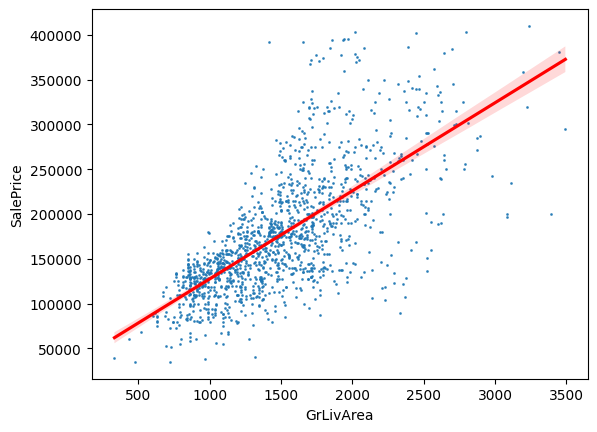

In [11]:
data["SalePriceZScore"] = np.abs(stats.zscore(data['SalePrice']))
data = data[data["SalePriceZScore"] < 3]
g = sns.regplot(data, x="GrLivArea", y="SalePrice", scatter_kws={"s": 1}, line_kws={"color":"r"})

Pojďme nyní provést výpočet regresního modelu. Výsledky zobrazíme v tabulce `OLS Regression Results`.

Tabulka je velmi rozsáhlá a my si vysvětlíme hlavní hodnoty, které nás zajímají.

Hlavní jsou hodnoty regresních koeficientů - `Intercept` a `GrLivArea`.

- `Intercept` je kontanta. Teoreticky nám říká, kolik by stál dům o nulové velikosti (což je samozřejmě v praxi nesmysl). Geometricky řečeno, pokud bychom protáhli červenou čáru, tento koeficient nám říká, kde by čára protla osu *y* (svislou osu).
- `GrLivArea` udává sklon čáry. Čím je koeficient vyšší, tím více si musíme připlatit za každou další čtvereční stopu. 

U nepřímých závislostí je koeficient u vysvětlující proměnné záporný (např. venkovní teplota a spotřeba energie na vytápění - čím je teplejší počasí, tím méně topíme, za každý stupeň nahoru klesně spotřeba o 100 kW).

In [12]:
formula = "SalePrice ~ GrLivArea"
mod = smf.ols(formula=formula, data=data)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.487
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     1357.
Date:                Sat, 21 Oct 2023   Prob (F-statistic):          1.39e-209
Time:                        08:54:24   Log-Likelihood:                -17491.
No. Observations:                1434   AIC:                         3.499e+04
Df Residuals:                    1432   BIC:                         3.500e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.911e+04   4171.056      6.979      0.000    2.09e+04    3.73e+04
GrLivArea     98.3600      2.670     36.844      0.000      93.123     103.597
==============================================================================
Omnibus:                      131.107   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              330.277
Skew:                           0.514   Prob(JB):                     1.91e-72
Kurtosis:                       5.114   Cond. No.                     5.14e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.14e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""